# 02. 데이터 탐색과 준비

In [2]:
library(lavaan)
library(sem)
library(semPlot)
library(semptools)

In [12]:
library(psych)
library(tidyverse)

<br>

<br>

## 02-01. 데이터탐색

<br>

#### `psych::describe()` : 평균, 표준편차, 최솟값, 최댓값, 왜도(skewness), 첨도(kurtosis)

In [8]:
Stu_Outlier <- read.csv(paste0(getwd(), "/Data/Stu_Outlier.csv"), header = TRUE)

In [14]:
Stu_Outlier %>% glimpse

Rows: 15
Columns: 6
$ ID <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
$ Y1 <dbl> 0.8, 2.2, 1.6, 2.6, 2.7, 2.1, 3.1, 3.0, 3.2, 2.6, 2.7, 3.0, 1.6, 0.…
$ Y2 <dbl> 2.0, 2.2, 2.0, 3.7, 3.2, 3.2, 3.7, 3.1, 2.6, 3.2, 2.8, 2.4, 1.4, 1.…
$ X1 <int> 72, 78, 84, 95, 88, 83, 92, 86, 88, 80, 87, 94, 73, 80, 83
$ X2 <int> 114, 117, 117, 120, 117, 123, 118, 114, 114, 115, 114, 112, 115, 11…
$ X3 <dbl> 17.3, 17.6, 15.0, 18.0, 18.7, 17.9, 17.3, 18.1, 16.0, 16.4, 17.6, 1…


In [9]:
psych::describe(Stu_Outlier)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,15,8.000000,4.4721360,8.0,8.000000,5.93040,1.0,15.0,14.0,0.0000000,-1.4413333,1.1547005
Y1,2,15,2.266667,0.7705904,2.6,2.307692,0.74130,0.8,3.2,2.4,-0.5736086,-1.0252936,0.1989656
Y2,3,15,2.513333,0.8683866,2.6,2.538462,0.88956,1.0,3.7,2.7,-0.2926213,-1.2809593,0.2242164
X1,4,15,84.200000,6.8889145,84.0,84.307692,5.93040,72.0,95.0,23.0,-0.1626779,-1.0163896,1.7787101
X2,5,15,118.733333,11.8168564,115.0,116.153846,2.96520,111.0,160.0,49.0,2.7894442,6.9438161,3.0510992
X3,6,15,17.013333,1.6413699,17.3,17.153846,1.18608,12.7,19.5,6.8,-1.0082410,0.8026455,0.4237999


<br>

#### `DescTools::Desc()` : 요약 통계량, 히스토그램, 상자그림, 누적분포함수 등의 그래프 출력

In [19]:
library(DescTools)
options(scipen = 100)

In [22]:
colnames(Stu_Outlier)

[1] "ID" "Y1" "Y2" "X1" "X2" "X3"

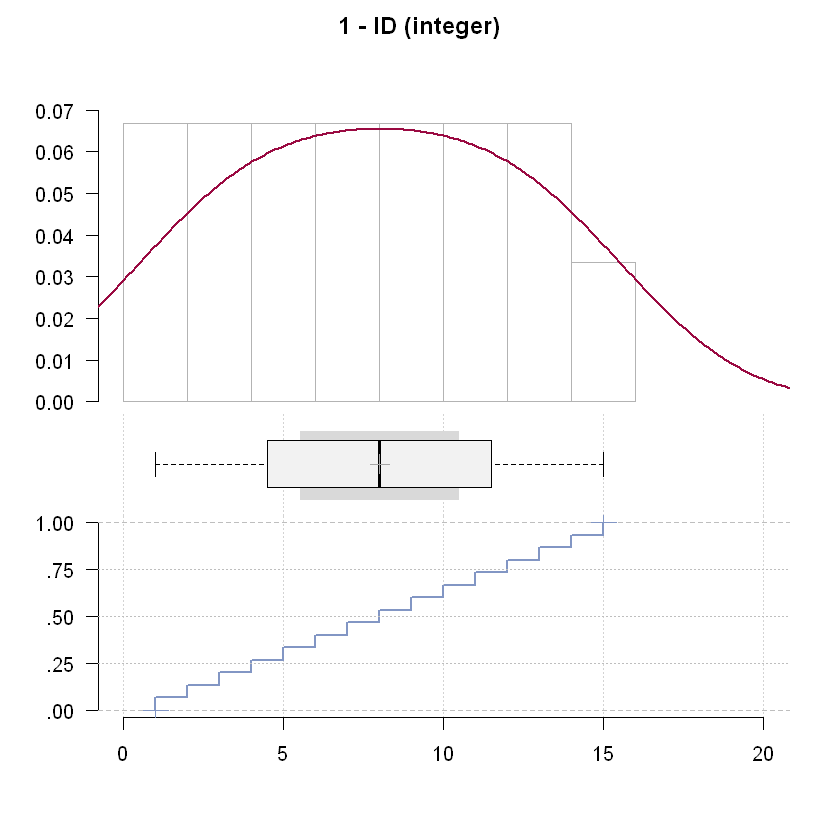

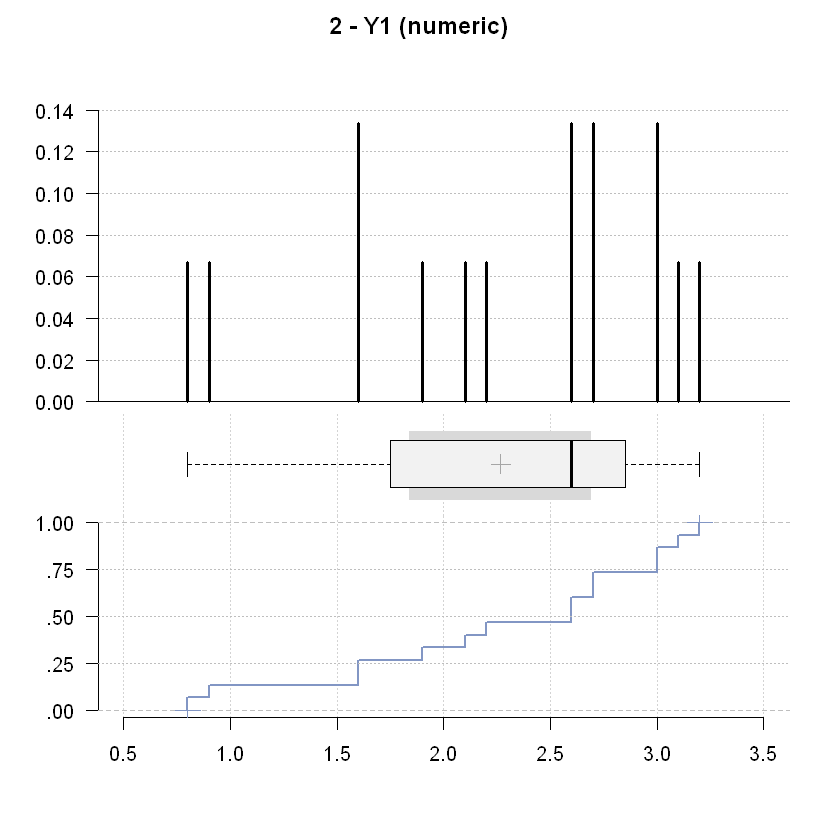

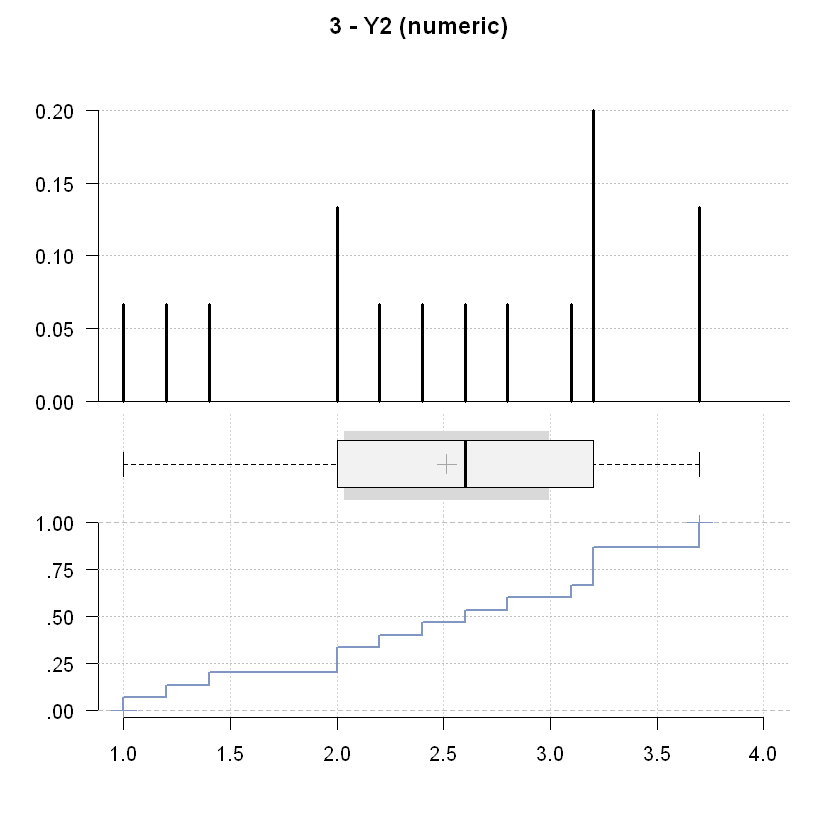

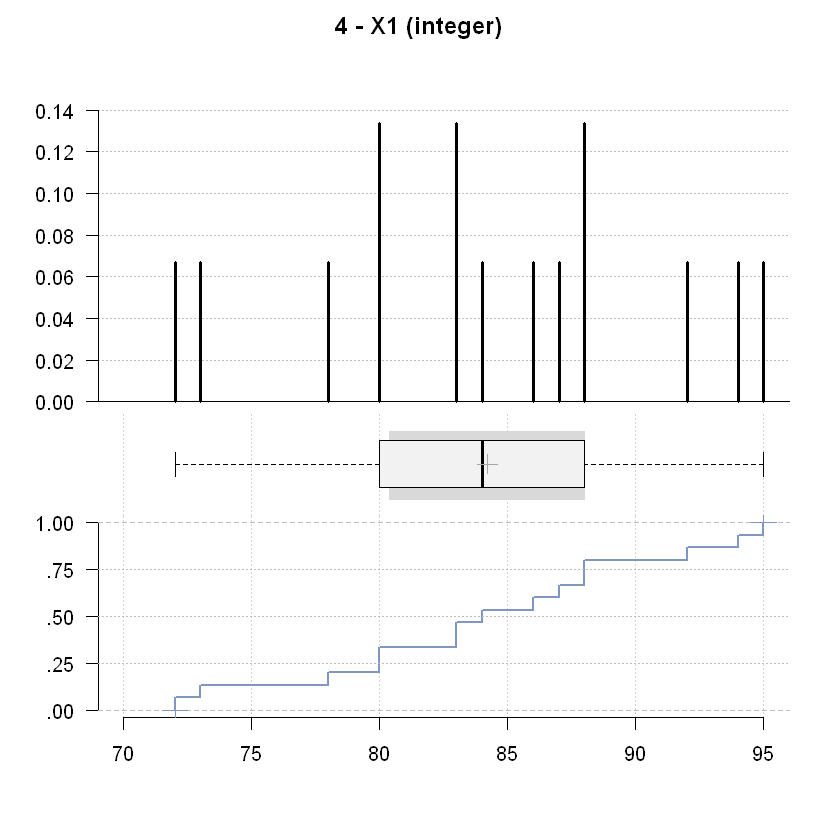

------------------------------------------------------------------------------ 
Describe Stu_Outlier (data.frame):

data frame:	15 obs. of  6 variables
		15 complete cases (100.0%)

  Nr  ColName  Class    NAs  Levels
  1   ID       integer  .          
  2   Y1       numeric  .          
  3   Y2       numeric  .          
  4   X1       integer  .          
  5   X2       integer  .          
  6   X3       numeric  .          


------------------------------------------------------------------------------ 
1 - ID (integer)

  length       n    NAs  unique      0s    mean  meanCI'
      15      15      0     = n       0   8.000   5.523
          100.0%   0.0%            0.0%          10.477
                                                       
     .05     .10    .25  median     .75     .90     .95
   1.700   2.400  4.500   8.000  11.500  13.600  14.300
                                                       
   range      sd  vcoef     mad     IQR    skew    kurt
  14.000   4.472 

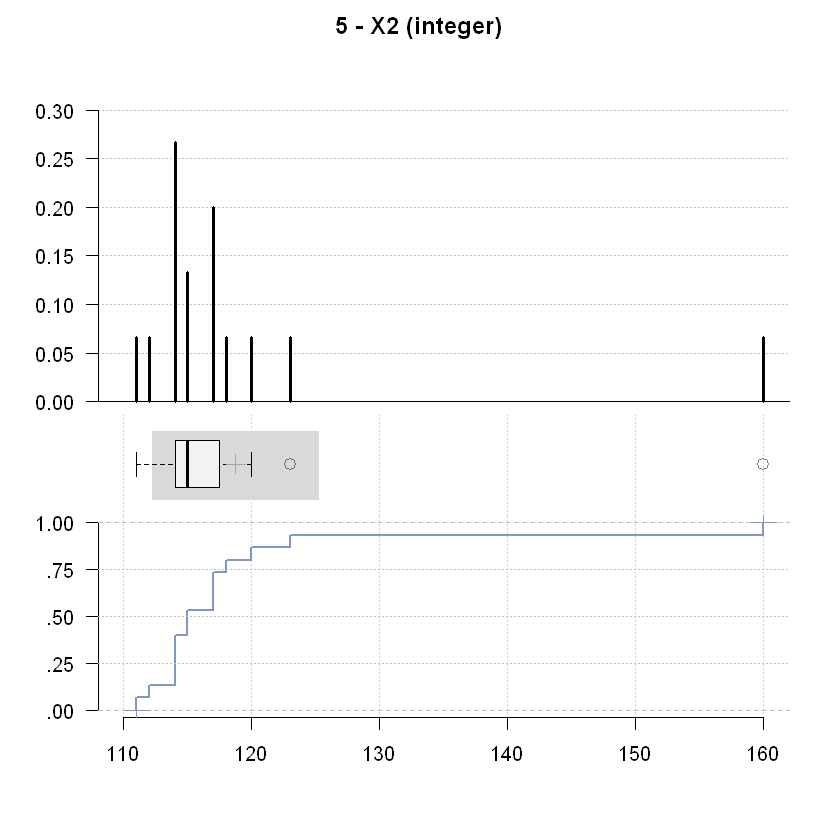

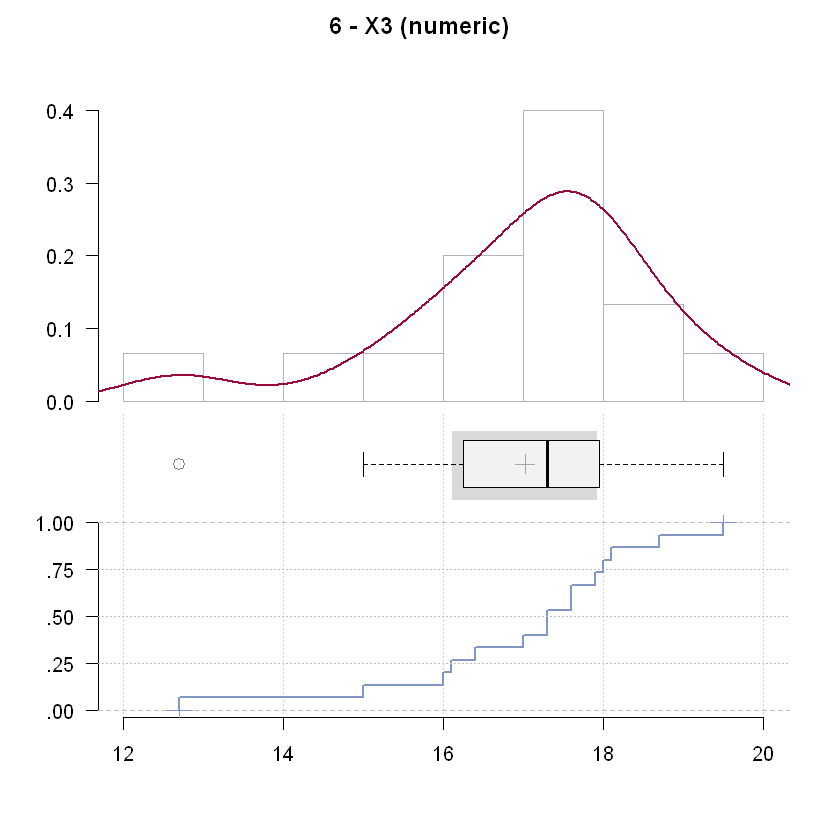

In [20]:
Desc(Stu_Outlier, lotit=True, digits=3)

<br>

## 02.02. 기술통계량

<br>

### 표본평균 : n개의 표본으로부터 관찰값 ($x_{1i}, \dots, x_{ni}$)을 얻은 경우
- 평균은 대푯값의 측도 $rightarrow$ 평균을 통해 관찰값들이 전체적으로 어디에 몰려있는지 진단

$$\bar{x_i}={1 \over n}\sum^n_{k=1} x_{ki}$$

<br>

### 분산, 표준편차, 변동계수
- 한 변수의 변이정도 (variability)는 분산(variance)로 측정
- 자료들이 평균으로부터 얼마만큼 떨어져 있는지를 측정하는 산포도(measure of dispersion)를 측도
- **변수 $x_i$의 표본분산 $s^2_{i}$**
    - 분산에 제곱근인 $s_i$는 표준편차 (standard deviation)
- **표준편차가 너무 크면 특이값이 존재할 가능성 증가, 표준편차가 너무 작게 나타나면 측정변수가 가지고 있는 정보가 많지 않다는 것을 의미**

$$s^2_i = {1 \over {n-1}}\sum^n_{j=1}(x_{ki} - \bar{x_i})^2$$

- 표준편차는 측정단위를 가지고 있기에, 측정단위가 다른 자료들의 산포도를 비교할 때에는 **변수 $x_i$의 변동계수 (coefficient of variation, 변이계수)**는 평균에 대한 표준편차의 백분율로 정의

$$CV_i = {s_i \over \bar{x_i}} \times 100(\%)$$

- 이는 측정단위에 의존하지 않으므로, 측정단위나 상대크기가 서로 다른 자료들의 산포도를 비교할 때 유용

<br>

### 왜도, 첨도
- **왜도 : 데이터 값들의 분포에 대한 비대칭의 정도**
    - 왜도가 0 : 자료분포의 형태가 좌우 대칭
    - 왜도 > 0 : 자료분포가 왼쪽으로 치우침 (오른쪽으로 긴 꼬리)
    - 왜도 < 0 : 자료분포가 오른쪽으로 치우침 (왼쪽으로 긴 꼬리)

$$Skewness = {1 \over {n-1}}\sum^n_{i=1}({{x_i - \bar{x}} \over {s}})^3$$

<br>

- **첨도 : 데이터 분포의 뾰족한 정도**
    - 표준정규분포의 첨도는 0
    - 첨도 > 0 : 자료분포의 형태가 표준정규분포보다 더 뾰족함
    - 첨도 < 0 : 자료분포의 형태가 표준정규분포보다 더 납작

$$Kurtosis = {1 \over {n-1}} \sum^n_{i=1}({{x_i - \bar{x}} \over {s}})^4 - 3$$

<br>

#### 데이터의 왜도 및 첨도가 정규분포와 유의하게 다른가를 검토하기 위해서는 표준화값 (standardized score) 계산 필요
- 왜도와 첨도의 표준화값 (Z-값)
    - Z-값은 근사적으로 표준정규분포를 따르므로, 일반적으로 $|Z|>3\;(또는\;2)$일 경우, 정규분포를 따르지 않는 것으로 판정
    - 표준오차는 표분크기에 영향을 받은 $\rightarrow$ 표본크기가 매우 클 경우에는 왜도와 첨도, Z-값, 히스토그램, 상자그림 등을 통해 전체적으로 검토하는 것이 바람직

$$Z-값 = {통계량 \over 표준오차}$$

$$왜도의\;표준오차\;=\;\sqrt{6/n}$$
$$첨도의\;표준오차\;=\;\sqrt{24/n}$$

<br>

- 왜도와 첨도에 대한 Z-값 계산

In [29]:
Stu.desc <- describe(Stu_Outlier)
Stu.desc$skew.z = Stu.desc$skew / sqrt(x = 6/Stu.desc$n)
Stu.desc$kurt.z <- Stu.desc$kurtosis / sqrt(x = 24/Stu.desc$n)

Stu.desc

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,skew.z,kurt.z
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,15,8.000000,4.4721360,8.0,8.000000,5.93040,1.0,15.0,14.0,0.0000000,-1.4413333,1.1547005,0.0000000,-1.1394741
Y1,2,15,2.266667,0.7705904,2.6,2.307692,0.74130,0.8,3.2,2.4,-0.5736086,-1.0252936,0.1989656,-0.9069549,-0.8105657
Y2,3,15,2.513333,0.8683866,2.6,2.538462,0.88956,1.0,3.7,2.7,-0.2926213,-1.2809593,0.2242164,-0.4626749,-1.0126872
X1,4,15,84.200000,6.8889145,84.0,84.307692,5.93040,72.0,95.0,23.0,-0.1626779,-1.0163896,1.7787101,-0.2572164,-0.8035265
X2,5,15,118.733333,11.8168564,115.0,116.153846,2.96520,111.0,160.0,49.0,2.7894442,6.9438161,3.0510992,4.4104986,5.4895686
X3,6,15,17.013333,1.6413699,17.3,17.153846,1.18608,12.7,19.5,6.8,-1.0082410,0.8026455,0.4237999,-1.5941690,0.6345470


<br>

### 정규성 검정
- 정규성 검정법 중 가장 널리 알려진 **샤피로-윌크(Shapiro-Wilk) 검정**
   - **샤피로-윌크 통계량 W는 0과 1 사이의 값을 가지며, W가 1에 가까우면 자료가 정규분포에 따름**
- **귀무가설 ($H_0$) : 모집단의 분포가 정규분포이다 (= $H_0\;:\;x_1, x_2, \dots, x_n\; \sim\;N(\mu, \sigma^2)$)**

In [30]:
shapiro.test(Stu_Outlier$X2)


	Shapiro-Wilk normality test

data:  Stu_Outlier$X2
W = 0.51977, p-value = 0.000005101


<br>

## 02.03. 상관계수

<br>

### 산점도 작성

In [31]:
Student <- read.csv(paste0(getwd(), "/Data/Student.csv"), header = TRUE)

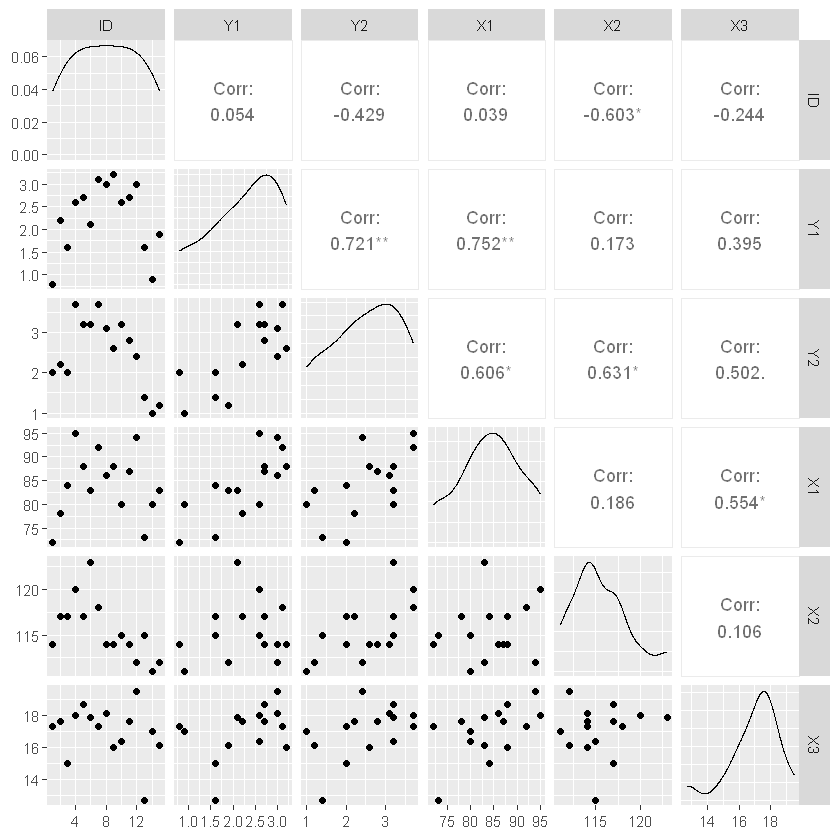

In [34]:
GGally::ggpairs(Student)

<br>

### 상관계수 계산
- 모상관계수가 0이라는 가설 ($H_0\;:\;\rho=0,\;H_1\;:\;\rho\neq0$)

- **상관계수는 구조방정식모형의 직접적인 분석 대상**
    - 상관계수의 부호과 크기가 이론적, 경험적 기대와 일치하는지를 검토
    - **상관계수가 기대되는 바와 다르게 나타나면, 이 데이터에 근거한 분석결과는 타당하지 않음**
    - **특히 잠재변수가 있는 모형을 설정할 경우, 각 관찰변수는 같은 잠재변수를 규정하는 변수 그룹들과 상대적으로 높은 상관계수를 가져야 함**
    
<br>

- 최소한의 상관성 : $\rho \pm 0.3$
- 중요한 상관성 : $\rho \pm 0.4$
- 실제적으로 유의한 상관성 : $\rho \pm 0.5$

<br>

#### 다중공선성
- **상관계수가 너무 커서 절댓값이 1에 가까울 경우 $\rightarrow$ 두 변수가 거의 동일한 의미이거나 같은 정보를 가지고 있다는 것을 나타냄**|

In [37]:
cor(Student)

,ID,Y1,Y2,X1,X2,X3
ID,1.00000000,0.05388982,-0.4285483,0.03941442,-0.6031532,-0.2442442
Y1,0.05388982,1.00000000,0.7212200,0.75215855,0.1726098,0.3945590
Y2,-0.42854831,0.72122003,1.0000000,0.60607963,0.6313374,0.5020009
X1,0.03941442,0.75215855,0.6060796,1.00000000,0.1857455,0.5537531
X2,-0.60315316,0.17260979,0.6313374,0.18574551,1.0000000,0.1058459
X3,-0.24424418,0.39455898,0.5020009,0.55375309,0.1058459,1.0000000


- 상관계수와 p-값을 함께 출력

In [39]:
library(Hmisc)

In [41]:
Student.matrix <- rcorr(as.matrix(Student))

In [42]:
Student.matrix

      ID   Y1    Y2   X1    X2    X3
ID  1.00 0.05 -0.43 0.04 -0.60 -0.24
Y1  0.05 1.00  0.72 0.75  0.17  0.39
Y2 -0.43 0.72  1.00 0.61  0.63  0.50
X1  0.04 0.75  0.61 1.00  0.19  0.55
X2 -0.60 0.17  0.63 0.19  1.00  0.11
X3 -0.24 0.39  0.50 0.55  0.11  1.00

n= 15 


P
   ID     Y1     Y2     X1     X2     X3    
ID        0.8487 0.1110 0.8891 0.0173 0.3803
Y1 0.8487        0.0024 0.0012 0.5384 0.1456
Y2 0.1110 0.0024        0.0166 0.0116 0.0565
X1 0.8891 0.0012 0.0166        0.5075 0.0322
X2 0.0173 0.5384 0.0116 0.5075        0.7073
X3 0.3803 0.1456 0.0565 0.0322 0.7073       

<br>

## 02.04. 공분산과 상관계수

<br>

### 공분산
- 두 변수 $x_i$, $x_j$에 대해서 n개의 쌍으로 관찰된 표본 $(x_{1i}, x_{1j}), \dots, (x_{ni}, x_{nj})$에 대하여, **두 변수의 성형적 연관성을 측정하는 공분산 (Covariance) $s_{ij}$**
    - 변수 $x_i$의 증가에 따른 변수 $x_j$의 증가 또는 감소의 경향을 나타내는 측도
    
$$s_{ij} = {1 \over {n-1}} \sum^n_{k=1} (x_{ki} - \bar{x}_i)(x_{kj}-\bar{x_j})$$

<br>

### 상관계수

- **공분산은 변수를 측정하는 단위에 의존하며, 그 값의 범위가 제한되어 있지 않아 크기를 상대적으로 비교하기 곤란함**
- **공분산 $s_{ij}$를 각 변수의 표준편차 $s_i$와 $s_j$로 나누면 상관계수 (Pearson's correlation coefficient)**
    - $x_i$, $x_j$의 선형성 정도를 나타내는 측도
    - $r_{ij}$측정단위에 무관하고, 값은 -1과 1사이에 있음
    - $r_{ij}$가 1에 가까우면, 큰 양의 상관, -1에 가까우면 큰 음의 상관을 가짐을 의미

$$r_{ij} = {{s_{ij}}\over{s_i\;s_j}} = {{\sum^n_{k=1}(x_{ki}-\bar{x_{i}})(x_{kj}-\bar{x_j})}} \over {{\sqrt{\sum^n_{k=1}(x_{ki}-\bar{x_i})^2}} {\sqrt{\sum^n_{k=1} (x_{kj}-\bar{x_j})^2}}}$$

<br>

* 표준화된 변수 $z_i = (z_{1i}, \dots, z_{ni})$, $z_j=(z_{1j}, \dots, z_{nj})$에 대해서 공분산을 구하면, 이는 상관계수와 동일

    (상관계수 = 표준화된 공분산)

#### 상관계수 행렬을 구조방정식의 분석대상으로 한다는 것은, 모든 변수를 표준화한 후 분석한다는 것과 같은 의미

<br>

#### 사회과학분야에서는 측정단위에 대한 명백한 의미를 부여하기 어려운 경우가 빈번
- 임의적인 척도를 사용하여 관찰변수를 츶겅 $\rightarrow$ 해석의 용이성이란 측면에서, 공분산 행렬 $S$보다는 상관계수 행렬 $R$을 분석하기도 함
    - 그러나 대부분의 구조방정식 모형에 관한 이론은 $S$에 기반하기에, $R$을 분석대상으로 하는 경우, 카이제곱 통계량과 같은 적합도의 척도나 추정치에 대한 표준오차 등이 바르게 제고오디지 않을 수 있음
    - 따라서 구조방정식모형을 분석함에 있어, 특별한 경우가 아니라면, 공분산 행렬 $S$에 기초하여 분석하는 것을 원칙으로 하고 있으며
    - 모수에 대해 측정단위에 의존하지 않는 해석을 하는 경우 표준화추정치 (standardized estimates)를 이용하는 것이 바람직

<br>

## 02.05. 결측값 처리

In [44]:
Stu_Missing <- read.csv(paste0(getwd(), "/Data/Stu_Missing.csv"), header = TRUE)
psych::describe(Stu_Missing)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,15,8.000000,4.4721360,8.0,8.000000,5.93040,1.0,15.0,14.0,0.0000000,-1.4413333,1.1547005
Y1,2,14,2.214286,0.7714693,2.4,2.250000,0.81543,0.8,3.2,2.4,-0.4843769,-1.1094445,0.2061838
Y2,3,14,2.592857,0.8425824,2.7,2.633333,0.74130,1.0,3.7,2.7,-0.4421961,-1.0224689,0.2251896
X1,4,12,84.666667,6.1987291,85.0,84.900000,4.44780,72.0,95.0,23.0,-0.2984030,-0.5853292,1.7894190
X2,5,14,115.785714,3.1666185,115.0,115.583333,2.96520,111.0,123.0,12.0,0.6274710,-0.2819931,0.8463144
X3,6,15,17.013333,1.6413699,17.3,17.153846,1.18608,12.7,19.5,6.8,-1.0082410,0.8026455,0.4237999


<br>

### 결측값 파악 및 제거

In [45]:
Stu_Missing$Nmiss <- rowSums(is.na(Stu_Missing))
Stu_Missing

ID,Y1,Y2,X1,X2,X3,Nmiss
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,0.8,2.0,72,114,17.3,0
2,2.2,2.2,78,117,17.6,0
3,1.6,2.0,84,117,15.0,0
4,2.6,3.7,95,120,18.0,0
5,2.7,3.2,88,117,18.7,0
6,2.1,3.2,83,123,17.9,0
7,3.1,3.7,92,118,17.3,0
8,3.0,3.1,86,114,18.1,0
9,3.2,2.6,88,114,16.0,0


<br>

#### 결측값 패턴 파악

In [60]:
# install.packages("VIM_6.2.2.tar.gz")
library(VIM)

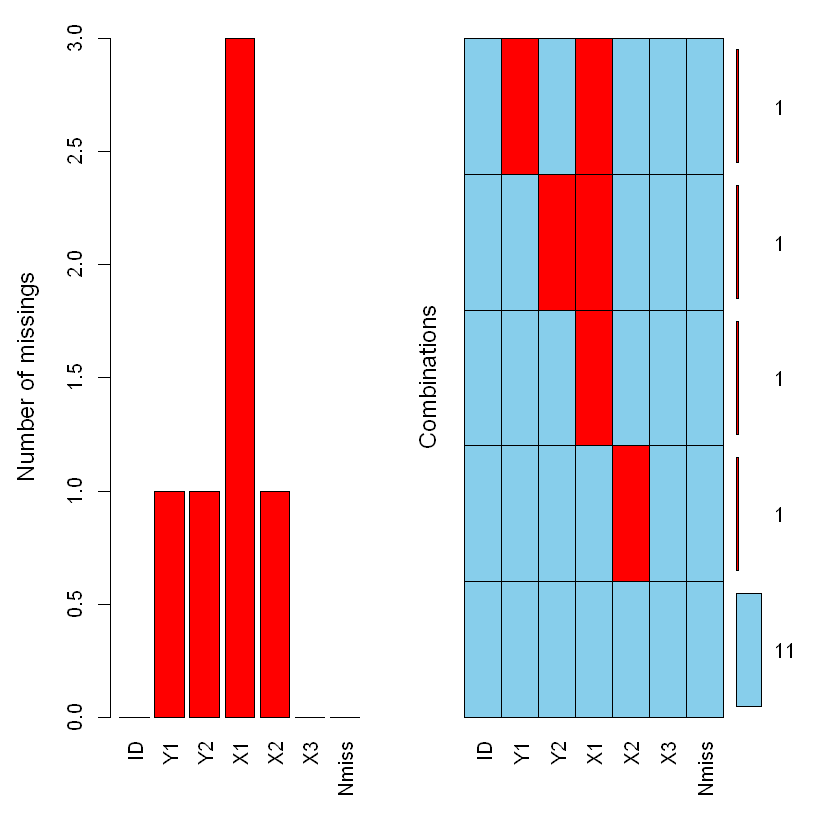

In [61]:
aggr(Stu_Missing, numbers=TRUE, prop=FALSE)

<br>

#### 결측값이 있는 데이터에 대한 상관분석

<br>

**목록별 결측값 제외 (listwise deletion)**
- 결측값이 하나라도 있는 개체를 모두 제거하고 완전한 데이터만 사용

In [55]:
cor(select(Stu_Missing, -"Nmiss"), use="complete.obs")

,ID,Y1,Y2,X1,X2,X3
ID,1.00000000,0.72364140,0.4453087,0.3770093,-0.29034647,-0.04234856
Y1,0.72364140,1.00000000,0.6682608,0.7374460,-0.05441361,0.19940268
Y2,0.44530867,0.66826085,1.0000000,0.7256591,0.42573587,0.49583887
X1,0.37700935,0.73744602,0.7256591,1.0000000,0.29344668,0.17529531
X2,-0.29034647,-0.05441361,0.4257359,0.2934467,1.00000000,0.25616155
X3,-0.04234856,0.19940268,0.4958389,0.1752953,0.25616155,1.00000000


<br>

**대응별 결측값 제외 (pairwise deletion)**
- 각각의 상관계수를 계산할 때 관련된 변수에 결측값이 있는 개체만 제거

In [58]:
cor(select(Stu_Missing, -"Nmiss"), use="pairwise.complete.obs")

,ID,Y1,Y2,X1,X2,X3
ID,1.00000000,-0.01203747,-0.3586027,0.2365055,-0.54874894,-0.24424418
Y1,-0.01203747,1.00000000,0.7436853,0.7358149,0.25196522,0.32448824
Y2,-0.35860273,0.74368535,1.0000000,0.6112946,0.61123291,0.38030013
X1,0.23650547,0.73581492,0.6112946,1.0000000,0.29344668,0.19239960
X2,-0.54874894,0.25196522,0.6112329,0.2934467,1.00000000,0.06257924
X3,-0.24424418,0.32448824,0.3803001,0.1923996,0.06257924,1.00000000


<br>

#### 결측값 대체
- **pmm (Predictive Mean Matching, 예측평균 매칭) : 수치형 (numeric) 변수에 대하여 회귀모형에 의해 결측값들을 대체**
- **logreg (logistic regression, 로지스틱 회귀) : 이항형 (binomial) 변수에 대하여 로지스틱 회귀모형에 의해 결측값들을 대체**
- **poly reg (Polynomous logistic regression, 다항 로지스틱 회귀) : 다항형 변수에 대하여 다항 로지스틱 회귀모형에 의해 결측값들을 대체**

- **polr (Proportional Odds Model, 비례오즈 모형) : 순서형 (ordinal) 변수에 대하여 비례오즈 모형 (순서형 로지스틱 회귀모형)에 의해 결측값들을 대체**

In [63]:
library(mice)

In [66]:
imp <- mice(select(Stu_Missing, -"Nmiss"), method='pmm')
Stu_Imputed <- complete(imp)
Stu_Imputed


 iter imp variable
  1   1  Y1  Y2  X1  X2
  1   2  Y1  Y2  X1  X2
  1   3  Y1  Y2  X1  X2
  1   4  Y1  Y2  X1  X2
  1   5  Y1  Y2  X1  X2
  2   1  Y1  Y2  X1  X2
  2   2  Y1  Y2  X1  X2
  2   3  Y1  Y2  X1  X2
  2   4  Y1  Y2  X1  X2
  2   5  Y1  Y2  X1  X2
  3   1  Y1  Y2  X1  X2
  3   2  Y1  Y2  X1  X2
  3   3  Y1  Y2  X1  X2
  3   4  Y1  Y2  X1  X2
  3   5  Y1  Y2  X1  X2
  4   1  Y1  Y2  X1  X2
  4   2  Y1  Y2  X1  X2
  4   3  Y1  Y2  X1  X2
  4   4  Y1  Y2  X1  X2
  4   5  Y1  Y2  X1  X2
  5   1  Y1  Y2  X1  X2
  5   2  Y1  Y2  X1  X2
  5   3  Y1  Y2  X1  X2
  5   4  Y1  Y2  X1  X2
  5   5  Y1  Y2  X1  X2


ID,Y1,Y2,X1,X2,X3
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,0.8,2.0,72,114,17.3
2,2.2,2.2,78,117,17.6
3,1.6,2.0,84,117,15.0
4,2.6,3.7,95,120,18.0
5,2.7,3.2,88,117,18.7
6,2.1,3.2,83,123,17.9
7,3.1,3.7,92,118,17.3
8,3.0,3.1,86,114,18.1
9,3.2,2.6,88,114,16.0


<br>

## 02.06. 변수변환
- 데이터가 정규분포를 따르지 않을 때, **변수변환 (variable transformation)**
- 변수변환의 가장 일반적인 형태는 **멱변환 (power transformation)**
    - $\lambda$의 값에 따라 변환의 형태가 결정
    - 변수가 왼쪽으로 치우쳐진 분포를 가지는 경우 로그 ($\lambda =0$), 제곱근($\lambda = 1/2$), 역수 ($\lambda = -1$)변환 등 $\lambda < 1$인 값을 취할 수 있음
    - 변수가 오른쪽으로 치우쳐진 분포를 가지는 경우 제곱 ($\lambda=2$)변환 등 $\lambda > 1$인 값을 취함
- **변수를 변환하면, 그 변수가 가지고 있는 원래의 단위를 잃게 되므로, 이후의 분석에서 결과를 해석할 때 해석이 어려워진다는 단점이 존재**

$$Y=
\begin{cases}
-X^{\lambda},\;if\;\lambda \neq 0\\
log_e {X},\;if\;\lambda = 0
\end{cases}$$

<br>

## 02.07. 표본크기

<br>

### 절대적 기준
- 다변량 자료분석 및 구조방정식 분야에서 최소 표본크기에 대한 경험적 기준 중 하나는 절대적 기준
    - Kline(2011)은 100개 이하의 경우 '작은', 100개에서 200개 사이는 '중간', 200개 이상의 경우 '큰' 표본크기로 규정
    - Comrey & Lee (1992)를 인용한 여러 문헌들에서는 표본크기가 100이면 '나쁜 표본', 200 정도면 '괜찮은 표본', 300 정도면 '좋은 표본', 500정도면 '매우 좋은 표본', 1000이상이면 '훌륭한 표본'
- **절대적 기준은 모형이나 자료의 특성을 고려하지 않기에, 특히 잠재변수가 없는 간단한 모형에 대하여 일반적으로 절대적 기준은 너무 큰 표본크기를 요구**

<br>

### 변수의 개수를 기준
- **관찰변수, 잠재변수, 자유모수의 개수를 기준으로 표본의 크기를 결정하는 방법이 가장 널리 사용**

<br>

#### 관찰변수의 수를 기준
- Nunnally(1967)가 변수의 개수에 대하여 적어도 10배의 표본크기를 가지는 것이 바람직하다고 언급 (10배수의 기준, $rule\;of\;10$)
- $n\;:p-비$(사례수 대 측정변수의 비율)에 대하여 5:1 또는 20:1과 같은 기준 사용

<br>

#### 자유모수의 수를 기준
- 모형의 복잡도를 고려하여 10배수의 기준이 자유모수(free parameter, 추정해야할 모수)의 수에 대하여 적용되는 것이 더 바람직하다고 언급
- Kline(2011)은 사례수와 자유모수의 비가 20:1정도 되면 좋을 것이나, 현실적으로는 10:1의 비를 목표로 하면 무난하다고 언급
- 사례수와 모수의 비가 5:1보다 작다면, 통계의 정확성이 의문시될 가능성 존재

<br>

#### 관찰변수와 잠재변수의 비를 기준
- 잠재변수가 있는 구조방정식 모형의 경우 '10배수의 기준'은 지나치게 많은 표본크기를 요구할 가능성이 존재
- Boomsma(1982)는 '잠재변수당 관찰변수의 비 $r(=p/k,\;p=관찰변수의\;개수,\;k=잠재변수의\;개수)$'를 사용할 것을 제안

$$n \geq 50r^2 - 450r+1100$$

<br>

#### 검정력 분석을 이용하는 방법
- 일반적으로 표본크기를 결정하는 데 있어, 고려되는 사항은 모수 추정치에 대한 통계적 정확도와 검정력
- 정확도 (precision)는 추정에 일치성이 있는지 또는 추정치와 표준오차가 얼마나 정확하게 산출되었는지를 의미
- 검정력 (power)는 $1-\beta$로 정의($\beta$는 제 2종 오류를 범활 확률), 대립가설이 사실일 때 대립가설을 채택할 확률
    - 일반적으로 검정력은 0.8을 넘는 것이 바람직
- 적절한 검정력이 확보될 때, 모수 추정치들에 대한 정확도도 실현된다는 점에서, 표본크기 결정에 대한 많은 접근법들은 검정력에 초점을 두는 경우가 많음


- 일반적으로 표본크기는 일정 기준의 검정력을 넘도록 유구
- 유의수준 $\alpha$와 효과크기 등 필요한 정보들이 주어진 상태에서, 검정통계량의 분포를 이용하여 주어진 검정력을 넘게되는 표본크기를 찾는 것

<br>

**잠재변수들 간의 상관계수를 기준**
- 관찰변수와 잠재변수의 비를 기준으로 하는 방법

    - 잠재변수가 있는 구조방정식모형에서 어떤 두 잠재변수들 간의 상관계수에 대하여 다음과 같은 가설이 존재한다고 가정

$$H_0; \rho=0\;vs\;H_1:\rho=\rho_1(\neq0)$$

<br>
- Westland(2010)은 위의 가설에 대한 검정력 분석을 통해 표본크기를 계산하는 방법을 제안 

(https://danielsoper.com/statcalc/) 

1. 예를 들어, 잠재변수가 3개이고 관찰변수가 10개일 때, 요구되는 표본크기는 $n_1 = 156$(Minimum sample size for model structure)
2. 유의수준 ($\alpha$) = 0.05, 검정력 ($1-\beta$)=0.9, 기대되는 상관계수($\rho_1=0.3$)의 조건하에서 요구되는 표본크기는 $n_2 = 153$(Minimum sample size to detect effect)
3. 마지막으로 $n_1$과 $n_2$ 중 더 큰값을 취하면 $n = max(n_1, n_2)=156$(Recommended minimum sample size)

<br>

#### 결정계수 $R^2$를 기준으로 하는 방법
- 경로분석모형 또는 잠재변수가 있는 구조방정식모형에서 경로계수에 대한 통계적 검정력을 추정하는 한 가지 방법은 다중 회귀분석을 이용하는 것
- 회귀분석에서 설명변수들에 의해 반응변수가 설명되는 정도를 평가하는 측도 중 하나는 결정계수 (coefficient of determination) $R^2$ (= SMC, Squared Multiple Correlation, 제곱 다중 상관)

$$f^2 = {{R^2}\over{1-R^2}}$$

**호과크기 $f^2$에 대한 일반적인 기준**
* 작은 효과크기 : $f^2 = 0.1\;(R^2=0.02)$
* 중간 효과크기 : $f^2 = 0.15\;(R^2=0.13)$
* 큰 효과크기 : $f^2 = 0.35\;(R^2=0.26)$

<br>

#### RMSEA를 기준으로 하는 방법
- **RMSEA(root mean square error of approximation)는 그 값이 0일 때 완벽한 적합도, 클수록 적합도가 좋지 않음을 나타내는 부적합도의 지수**

- RMSEA의 특징은 다른 적합도지수와는 달리 신뢰구간을 산출할 수 있음
- MacCallum 등 (1996)dms RMSEA에 기초하여 검정력 분석을 통한 표본크기 계산방법을 제안
    - $H_0:\epsilon_0 \leq 0.05$ (모형이 근사 적합도를 가짐) 라는 '근사 적합도' (close-fit)가설과, $H_0:\epsilon \geq 0.05$ (모형이 근사 적합도를 가지지 않음) 라는 '비근사 적합도' (not-close-fit) 가설에 대한 검정력 분석을 적용
- MacCallum 등 (1996)은 자유도에 따른 최소 표본크기를 계산하여 표로 제시, 다양한 웹 사이트, 프로그램에서 이 방법 사용 가능 

(https://quantpsy.org/rmsea/rmsea.htm)

- **그러나 이 방법은 일반적인 상황 (특히 자유도가 작은 경우)에서 지나치게 많은 표본크기를 요구하는 경향이 존재**

<br>

#### 모의실험을 이용하는 방법
- Satorra & Saris(1985)는 주어진 가정하에서 예측공분산행렬을 만들고, 관심이 되는 모수에 대한 검정력 분석을 수행하는 절차를 제시
- Muthen & Muthen (2002)는 Monte-Carlo 모의실험을 통해 주어진 모형에 대하여 검정력 분석을 수행하는 방법을 제시